## Regression using Deep Neural Networks

* Load Dataset From Sklearn


In [1]:
!pip install sklearn

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['TARGET'] = boston.target
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


* 지난시간 Linear Regression에서는 seaborn으로 특정 데이터만 콜라 머신러닝을 돌려보았음

* 이번에는 모든 데이터를 preprocessing하여 넣어 taget을 예측할 예정

* 입력하는 feature의 각 컬럼의 범위가 각각 다름 -> 해결 : 범위를 정규화

In [5]:
scaler = StandardScaler()
scaler.fit(df.values[:, :-1])
df.values[:,:-1] = scaler.transform(df.values[:,:-1])

df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,22.4
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,20.6
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,23.9
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,22.0
505,-0.415000,-0.487722,0.115738,-0.272599,0.158124,-0.362767,0.434732,-0.613246,-0.982843,-0.803212,1.176466,0.441052,-0.669058,11.9


### Train Model with Pytorch

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [7]:
data = torch.from_numpy(df.values).float()
data.shape

torch.Size([506, 14])

In [8]:
y = data[:,-1:]
x = data[:,:-1]

print(x.shape, y.shape)

torch.Size([506, 13]) torch.Size([506, 1])


In [9]:
n_epochs = 100000
learning_rate = 1e-4
print_interval = 5000

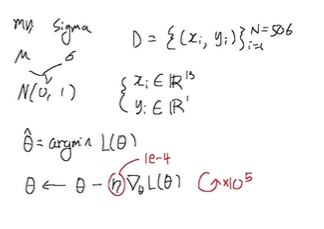

### Build Models

**Build Model using nn.Module**

In [10]:
relu = nn.ReLU()
leaky_relu = nn.LeakyReLU(0.1)

In [14]:
class MyModel(nn.Module):

  def __init__(self, input_dim, output_dim):
    self.input_dim = input_dim
    self.output_dim = output_dim

    super().__init__()

    self.linear1 = nn.Linear(input_dim, 3)
    self.linear2 = nn.Linear(3,3)
    self.linear3 = nn.Linear(3, output_dim)
    self.act = nn.ReLU()

  def forward(self, x):
    # |x| = (batch_size, input_dim) = (506 x 13) 
    h = self.act(self.linear1(x))
    h = self.act(self.linear2(h))
    y = self.linear3(h)
    # |y| = (batch_size, output_dim) = (506 x 1)
    return y

model = MyModel(x.size(-1), y.size(-1))

model

MyModel(
  (linear1): Linear(in_features=13, out_features=3, bias=True)
  (linear2): Linear(in_features=3, out_features=3, bias=True)
  (linear3): Linear(in_features=3, out_features=1, bias=True)
  (act): ReLU()
)

In [17]:
optimizer = optim.SGD(model.parameters(),
                     lr = learning_rate)

In [18]:
for i in range(n_epochs):
  y_hat = model(x)
  loss = F.mse_loss(y_hat, y)

  optimizer.zero_grad()
  loss.backward()

  optimizer.step()

  if (i+1) % print_interval == 0:
    print('Epoch %d: loss=%.4e' % (i+1, loss))

Epoch 5000: loss=1.2768e+01
Epoch 10000: loss=1.1183e+01
Epoch 15000: loss=1.0982e+01
Epoch 20000: loss=1.0929e+01
Epoch 25000: loss=1.0896e+01
Epoch 30000: loss=1.0795e+01
Epoch 35000: loss=1.0584e+01
Epoch 40000: loss=1.0493e+01
Epoch 45000: loss=1.0445e+01
Epoch 50000: loss=1.0297e+01
Epoch 55000: loss=1.0214e+01
Epoch 60000: loss=1.0093e+01
Epoch 65000: loss=9.9590e+00
Epoch 70000: loss=9.8966e+00
Epoch 75000: loss=9.8556e+00
Epoch 80000: loss=9.8308e+00
Epoch 85000: loss=9.7941e+00
Epoch 90000: loss=9.7409e+00
Epoch 95000: loss=9.7165e+00
Epoch 100000: loss=9.6946e+00


### Let's see the result !

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


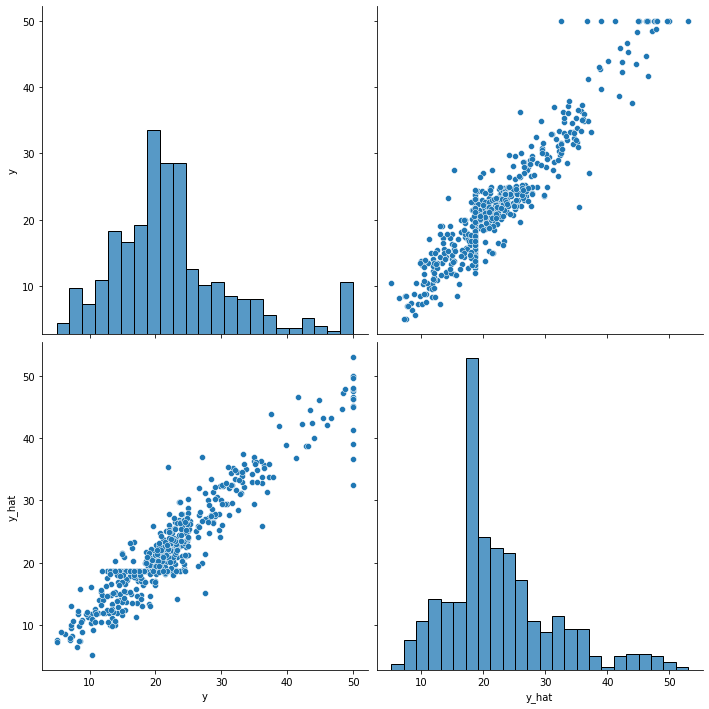

In [21]:
df = pd.DataFrame(torch.cat([y, y_hat], dim = 1).detach().numpy(),
                  columns=["y","y_hat"])

sns.pairplot(df, size=5)
plt.show()